In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('../data/processed/df_listo_para_eda.csv',sep=';')
df

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,Destino Turistico,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,Viajes Ocasionales,Temporada,PIB Region Origen,PIB Region Destino
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,Camiña,14,Tamarugal,1,Tarapacá,2019,1,enero,109,Alta,1061.580205,1061.580205
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,Colchane - P.N. Volcán Isluga,14,Tamarugal,1,Tarapacá,2019,1,enero,298,Alta,1061.580205,1061.580205
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,Resto región Tarapacá,14,Tamarugal,1,Tarapacá,2019,1,enero,2594,Alta,1061.580205,1061.580205
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,Pica,14,Tamarugal,1,Tarapacá,2019,1,enero,4138,Alta,1061.580205,1061.580205
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,Antofagasta,21,Antofagasta,2,Antofagasta,2019,1,enero,2071,Alta,1061.580205,3724.530431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952619,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,Valle del Itata,162,Itata,16,Ñuble,2023,12,diciembre,17,Alta,833.567298,833.567298
2952620,16305,San Nicolás,163,Punilla,16,Ñuble,16207,Treguaco,Resto región Ñuble,162,Itata,16,Ñuble,2023,12,diciembre,44,Alta,833.567298,833.567298
2952621,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,Resto región Ñuble,163,Punilla,16,Ñuble,2023,12,diciembre,108,Alta,833.567298,833.567298
2952622,16305,San Nicolás,163,Punilla,16,Ñuble,16303,Ñiquén,Resto región Ñuble,163,Punilla,16,Ñuble,2023,12,diciembre,47,Alta,833.567298,833.567298


In [66]:
# Factorizar las variables cátegoricas, para poder hacer matriz de correlaciónes 
df['CUT Destino Turistico'] = pd.factorize(df['Destino Turistico'])[0]
df['CUT Temporada'] = df['Temporada'].map({'Alta': 1, 'Baja': 0})

# Ordenar columnas
columnas = [
    'CUT Comuna Origen', 'Comuna Origen', 'CUT Provincia Origen', 'Provincia Origen',
    'CUT Region Origen', 'Region Origen', 'CUT Comuna Destino', 'Comuna Destino', 'CUT Destino Turistico',
    'Destino Turistico', 'CUT Provincia Destino', 'Provincia Destino', 'CUT Region Destino',
    'Region Destino', 'Anio', 'CUT Mes', 'Mes', 'Viajes Ocasionales', 'CUT Temporada', 'Temporada',
    'PIB Region Origen', 'PIB Region Destino'
]

df = df[columnas]

In [67]:
# Diccionario de regiones de norte a sur

norte_sur = {
    15: 1,
    1: 2,
    2: 3,
    3: 4,
    4: 5,
    5: 6,
    13: 7,
    6: 8,
    7: 9,
    16: 10,
    8: 11,
    9: 12,
    14: 13,
    10: 14,
    11: 15,
    12: 16
}

# Crear la nueva columna 'Norte a Sur' usando el diccionario
df['Norte a Sur Origen'] = df['CUT Region Origen'].map(norte_sur)
df['Norte a Sur Destino'] = df['CUT Region Destino'].map(norte_sur)

/var/folders/3p/lzyp6b9542b_8mk_q04l5p100000gn/T/ipykernel_4787/1215304671.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Norte a Sur Origen'] = df['CUT Region Origen'].map(norte_sur)
/var/folders/3p/lzyp6b9542b_8mk_q04l5p100000gn/T/ipykernel_4787/1215304671.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Norte a Sur Destino'] = df['CUT Region Destino'].map(norte_sur)


In [68]:
# Elimina las columnas 'Destino Turístico' y 'CUT Destino Turístico'
df = df.drop(columns=['Destino Turistico', 'CUT Destino Turistico', 'CUT Comuna Origen', 'Comuna Origen', 'CUT Provincia Origen', 
                 'Provincia Origen', 'CUT Region Origen', 'Region Origen', 'PIB Region Origen', 'Norte a Sur Origen'])

# Agrupa el DataFrame por las columnas de origen y destino, además del año y mes
df = df.groupby([
                 'CUT Comuna Destino', 'Comuna Destino', 'CUT Provincia Destino', 
                 'Provincia Destino', 'CUT Region Destino', 'Region Destino', 
                 'Anio', 'CUT Mes', 'Mes', 'CUT Temporada', 'Temporada', 
                 'PIB Region Destino', 'Norte a Sur Destino'], as_index=False).sum()
df

,CUT Comuna Destino,Comuna Destino,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,CUT Temporada,Temporada,PIB Region Destino,Norte a Sur Destino,Viajes Ocasionales
0,1101,Iquique,11,Iquique,1,Tarapacá,2019,1,enero,1,Alta,1061.580205,2,58075
1,1101,Iquique,11,Iquique,1,Tarapacá,2019,2,febrero,1,Alta,1061.580205,2,53523
2,1101,Iquique,11,Iquique,1,Tarapacá,2019,3,marzo,0,Baja,1061.580205,2,18760
3,1101,Iquique,11,Iquique,1,Tarapacá,2019,4,abril,0,Baja,1115.801838,2,17262
4,1101,Iquique,11,Iquique,1,Tarapacá,2019,5,mayo,0,Baja,1115.801838,2,27314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22717,16305,San Nicolás,163,Punilla,16,Ñuble,2024,2,febrero,1,Alta,852.296102,10,2507
22718,16305,San Nicolás,163,Punilla,16,Ñuble,2024,3,marzo,0,Baja,852.296102,10,2096
22719,16305,San Nicolás,163,Punilla,16,Ñuble,2024,4,abril,0,Baja,801.797197,10,1596
22720,16305,San Nicolás,163,Punilla,16,Ñuble,2024,5,mayo,0,Baja,801.797197,10,1658


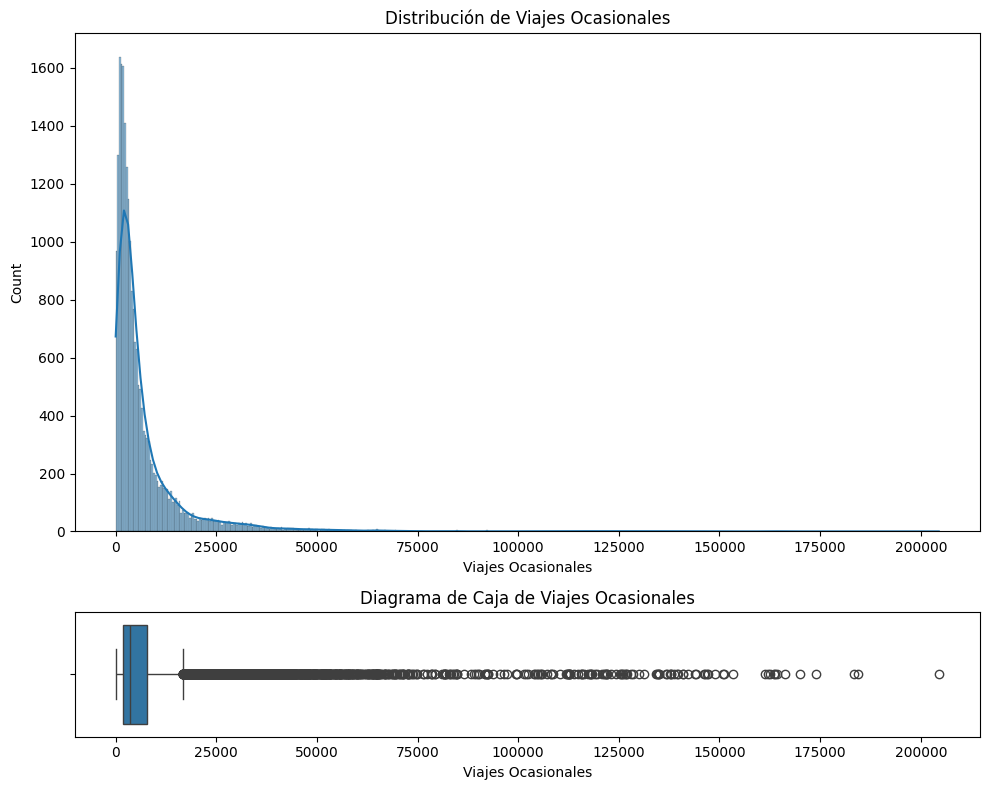

In [69]:
# Analisis univariante numérico Viajes Ocasionales

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=df, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=df, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()

In [70]:
df_prueba = df[(df['Viajes Ocasionales']>0)&(df['Viajes Ocasionales']<8000)]
df_prueba

,CUT Comuna Destino,Comuna Destino,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,CUT Temporada,Temporada,PIB Region Destino,Norte a Sur Destino,Viajes Ocasionales
15,1101,Iquique,11,Iquique,1,Tarapacá,2020,4,abril,0,Baja,1042.268636,2,3843
16,1101,Iquique,11,Iquique,1,Tarapacá,2020,5,mayo,0,Baja,1042.268636,2,4383
17,1101,Iquique,11,Iquique,1,Tarapacá,2020,6,junio,0,Baja,1042.268636,2,3560
18,1101,Iquique,11,Iquique,1,Tarapacá,2020,7,julio,1,Alta,1097.591186,2,4826
19,1101,Iquique,11,Iquique,1,Tarapacá,2020,8,agosto,0,Baja,1097.591186,2,5157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22717,16305,San Nicolás,163,Punilla,16,Ñuble,2024,2,febrero,1,Alta,852.296102,10,2507
22718,16305,San Nicolás,163,Punilla,16,Ñuble,2024,3,marzo,0,Baja,852.296102,10,2096
22719,16305,San Nicolás,163,Punilla,16,Ñuble,2024,4,abril,0,Baja,801.797197,10,1596
22720,16305,San Nicolás,163,Punilla,16,Ñuble,2024,5,mayo,0,Baja,801.797197,10,1658


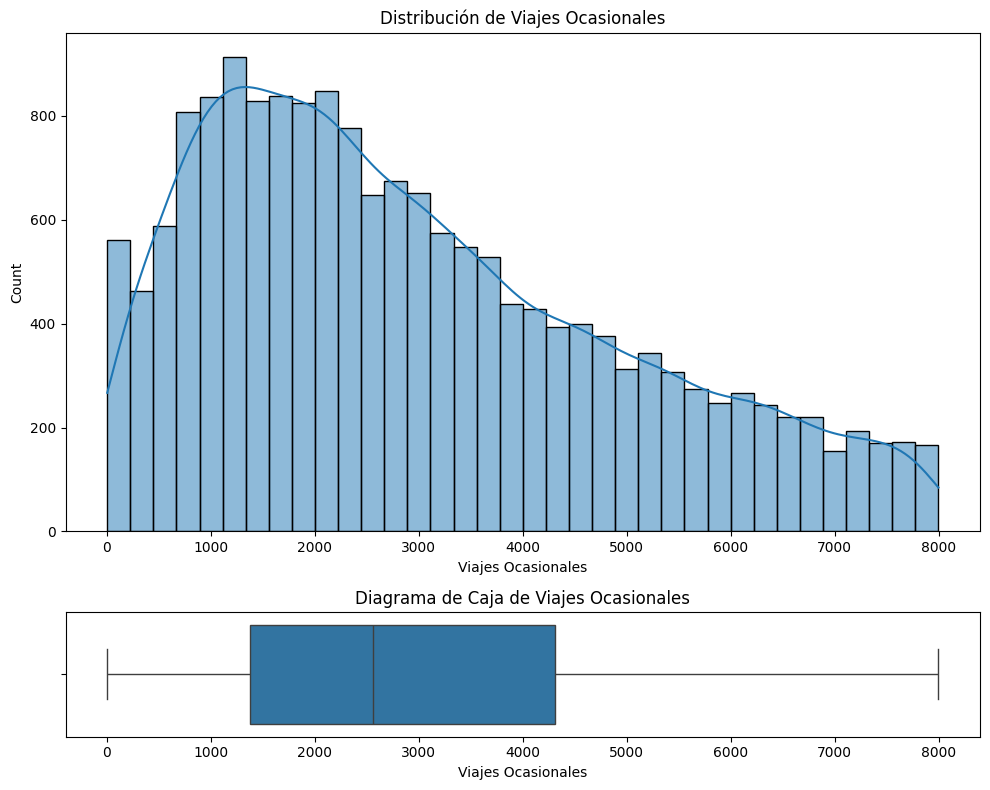

In [71]:
# Analisis univariante numérico Viajes Ocasionales

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=df_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=df_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()

In [72]:
df_prueba = df[(df['Viajes Ocasionales']>8000)&(df['Viajes Ocasionales']<30000)]
df_prueba

,CUT Comuna Destino,Comuna Destino,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,CUT Temporada,Temporada,PIB Region Destino,Norte a Sur Destino,Viajes Ocasionales
2,1101,Iquique,11,Iquique,1,Tarapacá,2019,3,marzo,0,Baja,1061.580205,2,18760
3,1101,Iquique,11,Iquique,1,Tarapacá,2019,4,abril,0,Baja,1115.801838,2,17262
4,1101,Iquique,11,Iquique,1,Tarapacá,2019,5,mayo,0,Baja,1115.801838,2,27314
5,1101,Iquique,11,Iquique,1,Tarapacá,2019,6,junio,0,Baja,1115.801838,2,12651
6,1101,Iquique,11,Iquique,1,Tarapacá,2019,7,julio,1,Alta,1180.893537,2,28915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22602,16304,San Fabián,163,Punilla,16,Ñuble,2020,1,enero,1,Alta,759.399509,10,8459
22603,16304,San Fabián,163,Punilla,16,Ñuble,2020,2,febrero,1,Alta,759.399509,10,9186
22626,16304,San Fabián,163,Punilla,16,Ñuble,2022,1,enero,1,Alta,821.887135,10,8233
22627,16304,San Fabián,163,Punilla,16,Ñuble,2022,2,febrero,1,Alta,821.887135,10,8204


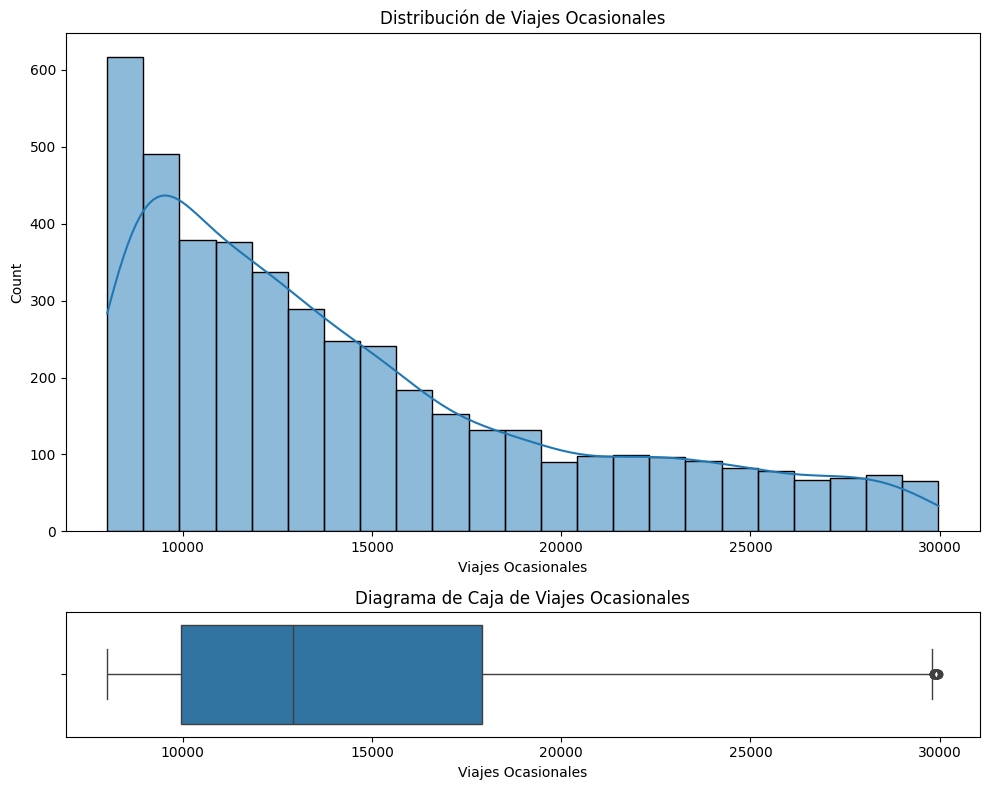

In [73]:
# Analisis univariante numérico Viajes Ocasionales

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=df_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=df_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()

In [79]:
df_prueba = df[(df['Viajes Ocasionales']>30000)&(df['Viajes Ocasionales']<70000)]
df_prueba

,CUT Comuna Destino,Comuna Destino,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,CUT Temporada,Temporada,PIB Region Destino,Norte a Sur Destino,Viajes Ocasionales
0,1101,Iquique,11,Iquique,1,Tarapacá,2019,1,enero,1,Alta,1061.580205,2,58075
1,1101,Iquique,11,Iquique,1,Tarapacá,2019,2,febrero,1,Alta,1061.580205,2,53523
7,1101,Iquique,11,Iquique,1,Tarapacá,2019,8,agosto,0,Baja,1180.893537,2,31292
11,1101,Iquique,11,Iquique,1,Tarapacá,2019,12,diciembre,1,Alta,1202.639412,2,35762
12,1101,Iquique,11,Iquique,1,Tarapacá,2020,1,enero,1,Alta,1136.354511,2,57351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21769,16107,Quillón,161,Diguillin,16,Ñuble,2022,2,febrero,1,Alta,821.887135,10,35818
21780,16107,Quillón,161,Diguillin,16,Ñuble,2023,1,enero,1,Alta,812.578681,10,43006
21781,16107,Quillón,161,Diguillin,16,Ñuble,2023,2,febrero,1,Alta,812.578681,10,30712
21792,16107,Quillón,161,Diguillin,16,Ñuble,2024,1,enero,1,Alta,852.296102,10,48070


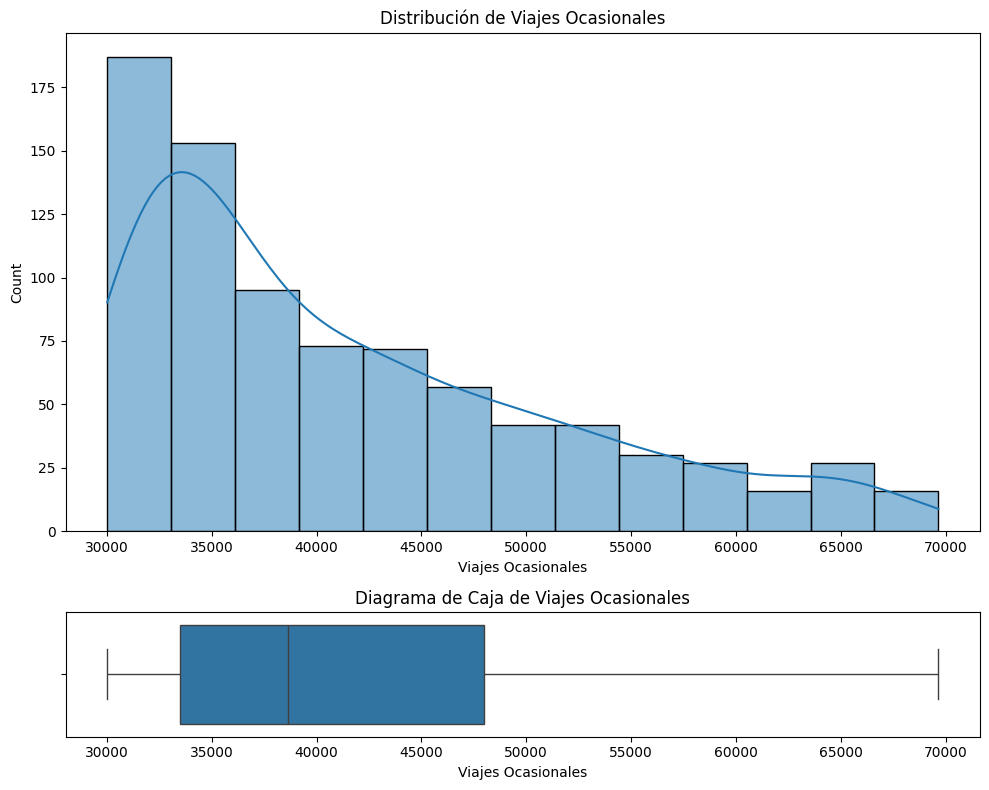

In [80]:
# Analisis univariante numérico Viajes Ocasionales

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=df_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=df_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()

In [81]:
df_prueba = df[(df['Viajes Ocasionales']>70000)&(df['Viajes Ocasionales']<7000000)]
df_prueba

,CUT Comuna Destino,Comuna Destino,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,CUT Temporada,Temporada,PIB Region Destino,Norte a Sur Destino,Viajes Ocasionales
1650,4101,La Serena,41,Elqui,4,Coquimbo,2019,1,enero,1,Alta,1477.074832,5,104763
1651,4101,La Serena,41,Elqui,4,Coquimbo,2019,2,febrero,1,Alta,1477.074832,5,128582
1662,4101,La Serena,41,Elqui,4,Coquimbo,2020,1,enero,1,Alta,1506.684729,5,112507
1663,4101,La Serena,41,Elqui,4,Coquimbo,2020,2,febrero,1,Alta,1506.684729,5,162563
1675,4101,La Serena,41,Elqui,4,Coquimbo,2021,2,febrero,1,Alta,1474.192944,5,74866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20779,14108,Panguipulli,141,Valdivia,14,Los Ríos,2022,2,febrero,1,Alta,672.220937,13,117714
20790,14108,Panguipulli,141,Valdivia,14,Los Ríos,2023,1,enero,1,Alta,666.270990,13,99600
20791,14108,Panguipulli,141,Valdivia,14,Los Ríos,2023,2,febrero,1,Alta,666.270990,13,110348
20802,14108,Panguipulli,141,Valdivia,14,Los Ríos,2024,1,enero,1,Alta,698.000305,13,83208


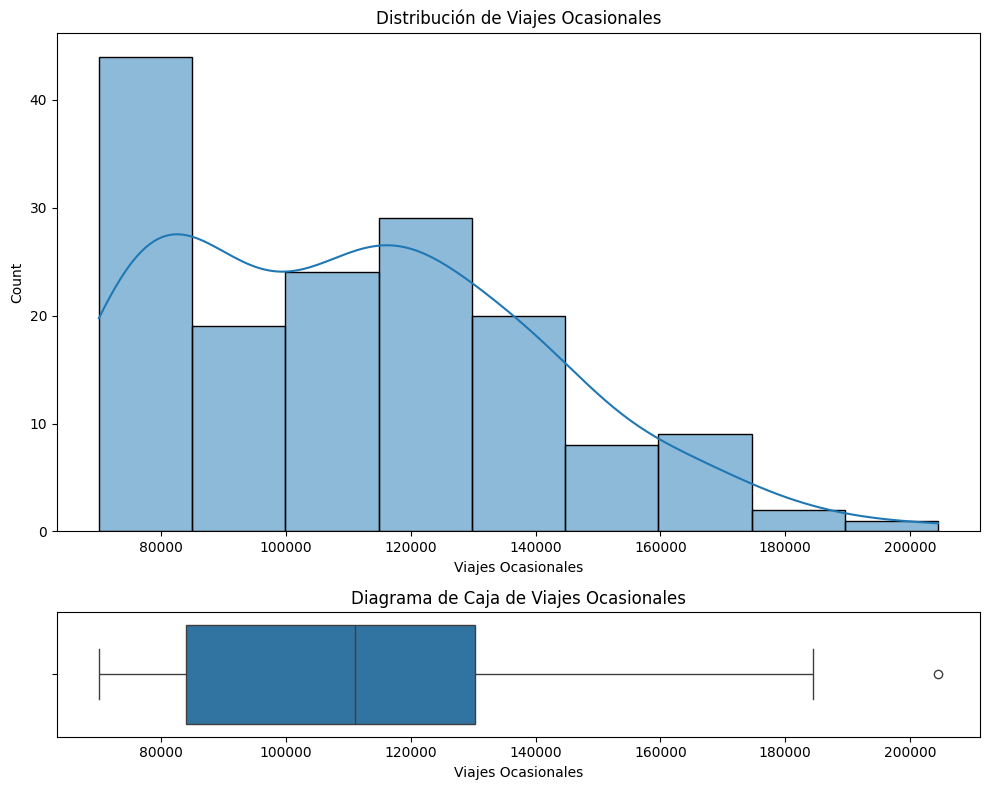

In [82]:
# Analisis univariante numérico Viajes Ocasionales

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=df_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=df_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()

In [93]:
# Agrupación y suma de viajes ocasionales por Comuna de Destino
Total_viajes_comuna_d = df.groupby('Comuna Destino')['Viajes Ocasionales'].sum().reset_index()
comuna_region_d = df[['Comuna Destino', 'Region Destino']].drop_duplicates()
Total_viajes_comuna_d = pd.merge(Total_viajes_comuna_d, comuna_region_d, on='Comuna Destino', how='left')
Total_viajes_comuna_d = Total_viajes_comuna_d[['Region Destino','Comuna Destino','Viajes Ocasionales']]
Total_viajes_comuna_d = df.groupby('Comuna Destino')['Viajes Ocasionales'].sum().reset_index()
Total_viajes_comuna_d['Porcentaje'] = (Total_viajes_comuna_d['Viajes Ocasionales'] / Total_viajes_comuna_d['Viajes Ocasionales'].sum()) * 100
Total_viajes_comuna_d = Total_viajes_comuna_d.sort_values(by='Porcentaje', ascending=False)

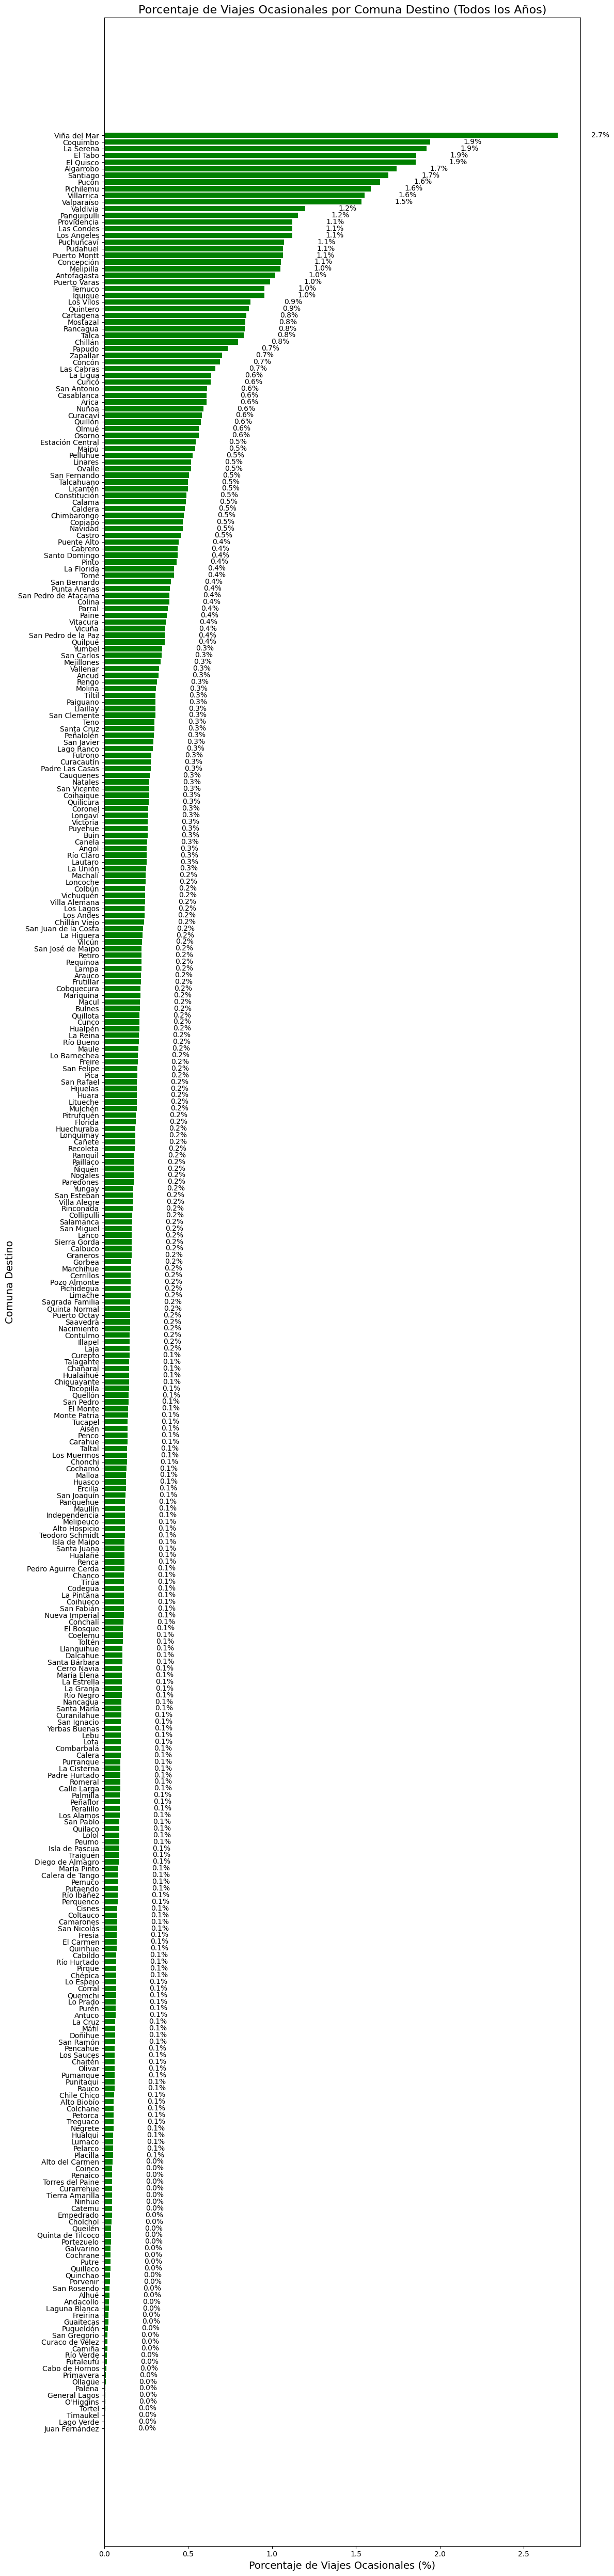

In [94]:
# Gráfico de barras Comunas Destino

plt.figure(figsize=(12, 50))

# Barras horizontales

bars = plt.barh(Total_viajes_comuna_d['Comuna Destino'], Total_viajes_comuna_d['Porcentaje'], color='green')

# Mayor valor de viajes esté en la parte superior

plt.gca().invert_yaxis()

# Agregar porcentajes al final de cada barra

for bar, porcentaje in zip(bars, Total_viajes_comuna_d['Porcentaje']):
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2,
             f'{porcentaje:.1f}%', va='center', fontsize=10)


plt.title('Porcentaje de Viajes Ocasionales por Comuna Destino (Todos los Años)', fontsize=16)
plt.xlabel('Porcentaje de Viajes Ocasionales (%)', fontsize=14)
plt.ylabel('Comuna Destino', fontsize=14)
plt.tight_layout()
plt.show()